I will be working with the [Kaggle Pulsar Data Set](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate?select=pulsar_data_train.csv) stored in `pulsar_data.zip`. A pulsar is a rapidly spinning neutron star, which is the small incredibly dense remnant of a much more massive star. A teaspoon of matter from a neutron star weighs as much as Mount Everest and the neutron star is so compact. Neutron stars spin between seven and forty thousand times a minute and form with incredibly strong magnetic fields. Rapid spin and intense magnetic fields drive powerful beams of electromagnetic radiation including gamma rays. As the pulsar rotates, these beams sweep the sky like a lighthouse. To a distant observer, the pulsar appears to blink on and off. They are of considerable scientific interest as probes of space-time, the interstellar medium, and states of matter. Eight continuous variables and one class variable are used to describe each candidate. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:

*Attribute Information:* (target_class: no pulsar=0, pulsar=1)

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve.

In [1]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


# The data is loaded from a CSV file

In [2]:
df_pulsar = pd.read_csv("pulsar_data.zip" , delimiter=",") #df = data frame
df_pulsar = df_pulsar.fillna(method="ffill") # I replace NaN values with values in the same column
df_pulsar[0:8]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,22.362553,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,20.618009,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,20.618009,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


**There are 12528 records in dataframe.**

In [4]:
df_pulsar.shape

(12528, 9)

# In this section, I would like to test whether the dataframe contains NaN values

In [5]:
df_pulsar.isnull().any().any()

False

**There are no NaN values**

# Descriptive statistics:

In [6]:
df_pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.475897,1.778431,12.674758,26.399141,8.333489,105.766892,0.092034
std,25.672828,6.801077,1.057663,6.208450,29.613230,19.697925,4.535783,107.962795,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.026648,-0.188142,1.910535,14.416847,5.803063,35.036812,0.000000
50%,115.183594,46.931022,0.224051,0.203317,2.792642,18.416900,8.451097,83.178682,0.000000
75%,127.109375,50.979103,0.471968,0.932374,5.413253,28.339084,10.727927,140.071795,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


# I use the Seaborn `heatmap()` function to determine which features have the most impact on `target_class`.

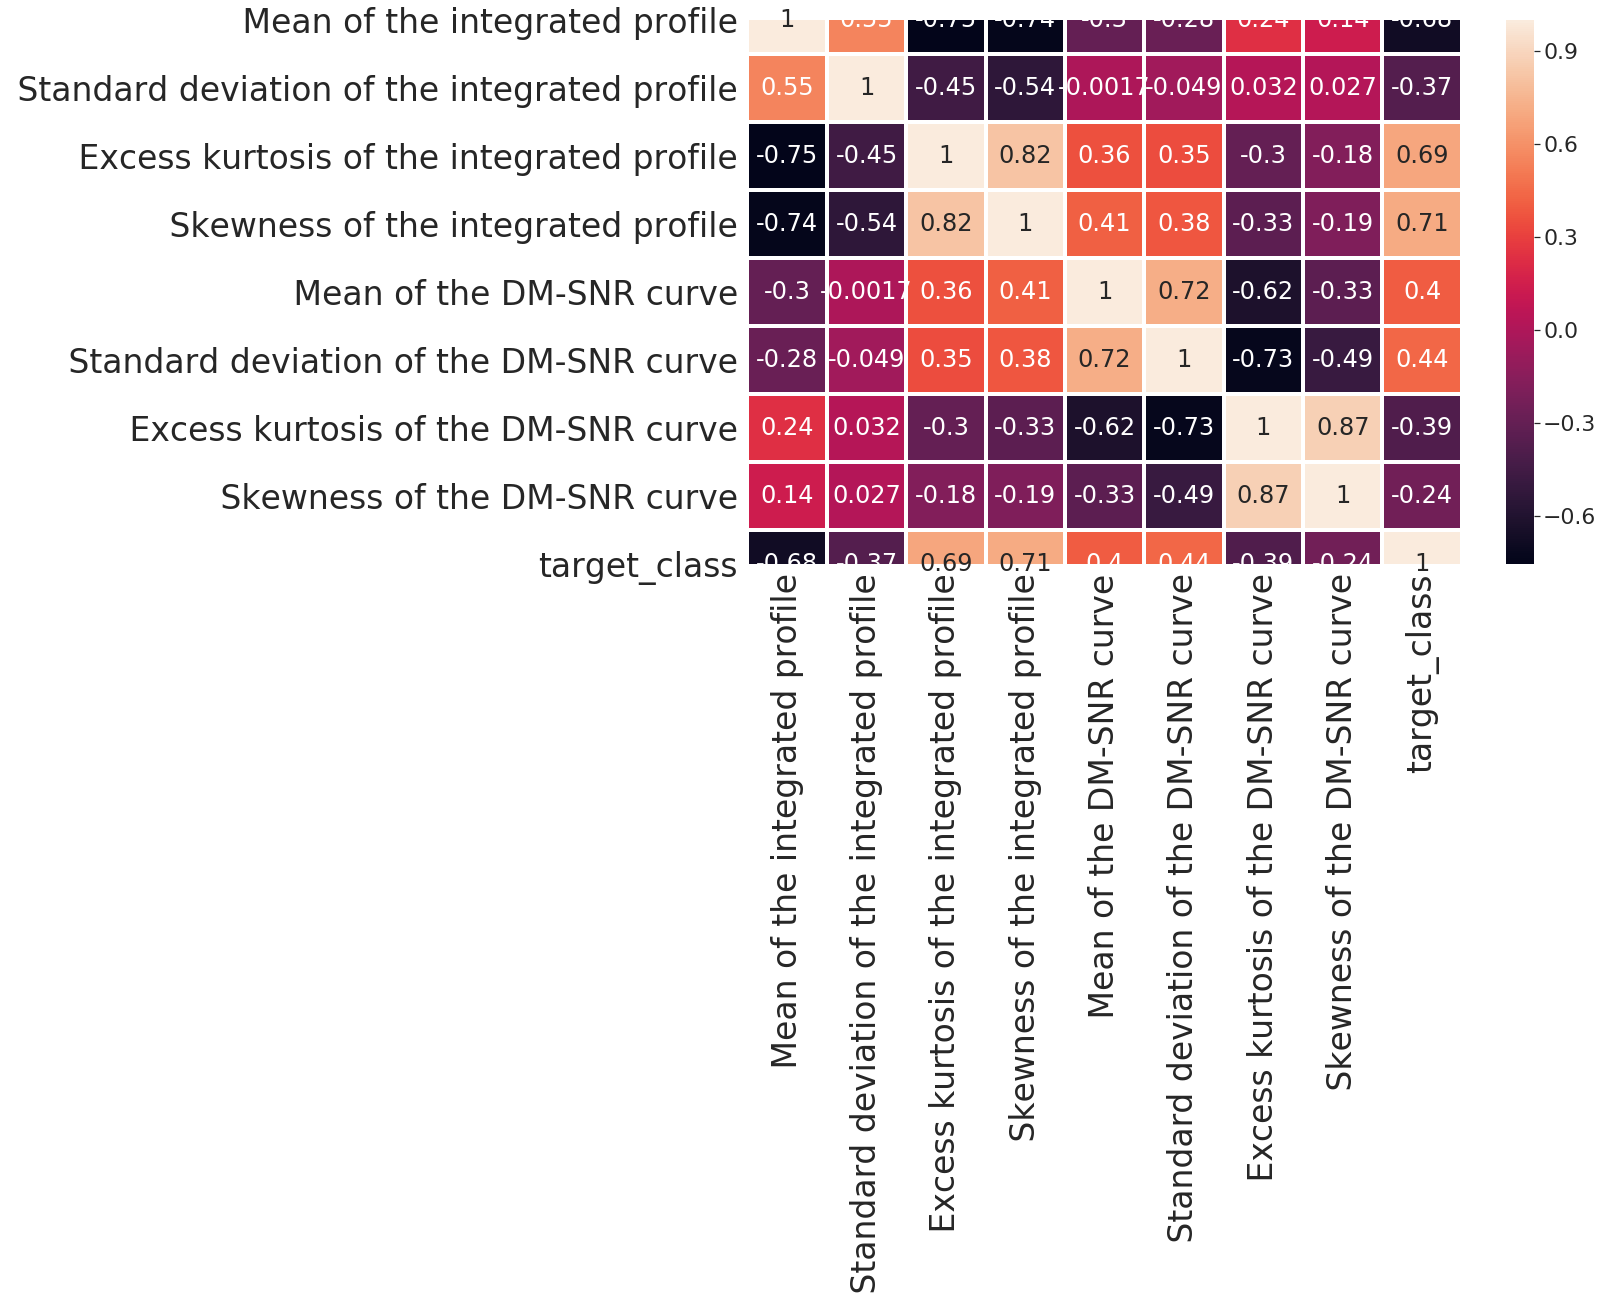

In [4]:
fig, ax = plt.subplots(figsize=(16,10))  
sns.set(font_scale=2.0)
sns.heatmap(df_pulsar.corr() , annot= True, linewidths=3, ax=ax)

## target_class is greatly influenced by:
### 1. Skewness of the integrated profile(0.71) 
### 2. Excess kurtosis of the integrated profile(0.69) 
### 3. Standard deviation of the DM-SNR curve(0.44)
### 4. Mean of the DM-SNR curve(0.40)

### I would like to visualize these four most influential features and the target_class.

# In order to have high-quality graphs, I rename columns as follows:
**1. f1 = Skewness of the integrated profile**

**2. f2 = Excess kurtosis of the integrated profile**

**3. f3 = Standard deviation of the DM-SNR curve**

**4. f4 = Mean of the DM-SNR curve**

In [8]:
df_pulsar_copy = df_pulsar.rename(columns={" Skewness of the integrated profile": "f1", 
" Excess kurtosis of the integrated profile": "f2", " Standard deviation of the DM-SNR curve": "f3", 
" Mean of the DM-SNR curve": "f4"})
df_pulsar_copy = df_pulsar_copy[['f1', 'f2', 'f3', 'f4', 'target_class']]
df_pulsar_copy.head()

,f1,f2,f3,f4,target_class
0,-0.013165,0.375485,18.399367,3.168896,0.0
1,3.388719,0.712898,17.570997,2.399666,0.0
2,-0.297242,0.133408,22.362553,2.743311,0.0
3,-0.171294,-0.215989,22.362553,17.471572,0.0
4,3.274125,0.825013,20.618009,2.790134,0.0


# Histogram of target_class

Text(0.5, 1.0, '1153 pulsar stars & 11375 no pulsar stars')

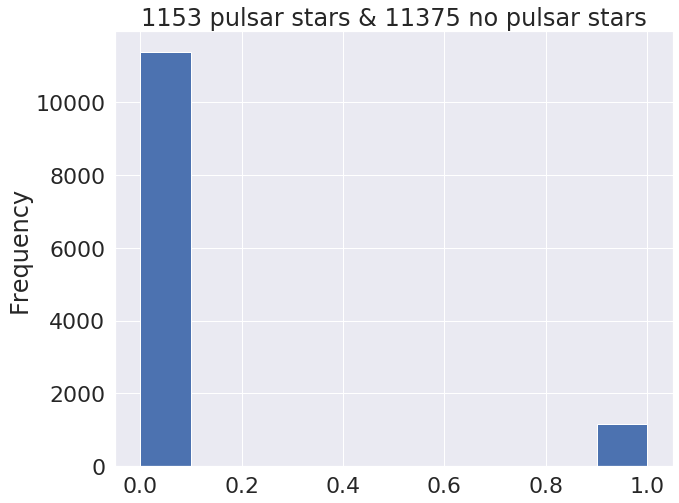

In [9]:
df_pulsar_copy.target_class.hist(figsize=(10, 8))
plt.ylabel('Frequency')
plt.title('1153 pulsar stars & 11375 no pulsar stars')

### Data Visualization and Analysis:

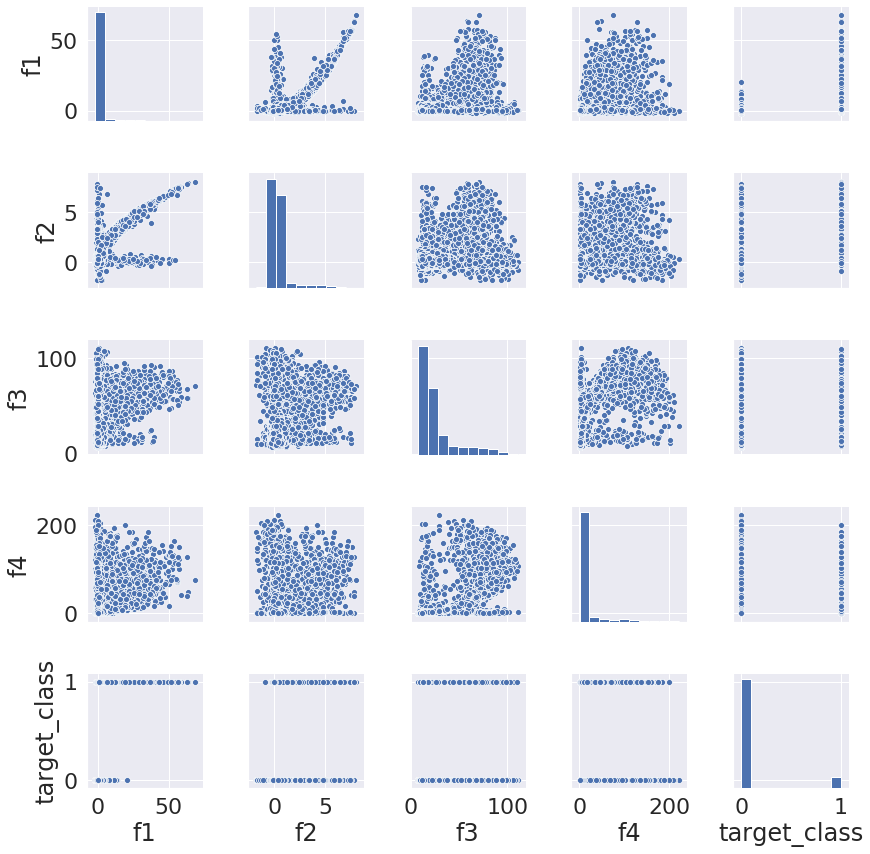

In [10]:
sns.set(font_scale=2.0)
sns.pairplot(df_pulsar_copy)

## Boxplots and outliers

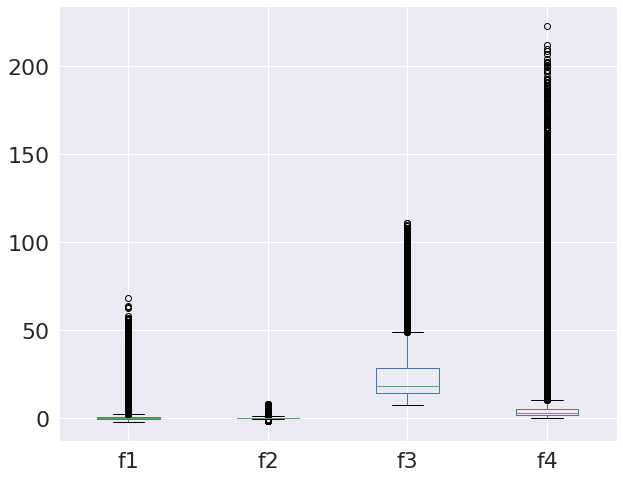

In [11]:
plt.figure(figsize=(10, 8))
boxplot = df_pulsar_copy.boxplot(column=['f1', 'f2', 'f3', 'f4']) 

# Split the DataFrame into X (the data) and y (the labels), where:

In [12]:
X = df_pulsar[[' Skewness of the integrated profile', ' Excess kurtosis of the integrated profile',
                     ' Standard deviation of the DM-SNR curve', ' Mean of the DM-SNR curve']]   
y = df_pulsar['target_class'] 

# DummyClassifier

The dummy classifier gives us a measure of “baseline” performance — i.e. the success rate one should expect to achieve even if simply guessing.

In [13]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

## Model Accuracy

In [14]:
print('Accuracy of dummyclassifier: {:.2f}' .format(dummy_clf.score(X, y)))

Accuracy of dummyclassifier: 0.91


# LogisticRegression

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#By default, cross_val_score performs three-fold cross-validation, returning three accuracy values. I change the number of folds
#used by changing the cv parameter.
scores = cross_val_score(logreg, X, y, cv=10)
print("cross-validation scores: ", scores)
print('Mean of cross-validation accuracy: {:.2f}' .format(scores.mean()))

cross-validation scores:  [0.96889952 0.97448166 0.97448166 0.97047087 0.97286512 0.96964856
 0.97523962 0.97523962 0.97124601 0.96565495]
Mean of cross-validation accuracy: 0.97


Based on the scores I see for the Pulsar dataset above, the accuracy ranges between 96% and 98%. It gives me an idea of how the model will perform in the worst and best-case scenarios when applied to new data. Its main disadvantage is that it increases computational costs. Due to the fact that I am now training 10 models, instead of one, cross-validation will be roughly 10 times slower than doing one split of the data.

# Using train_test_split, split X and y into training and test sets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# `ROC` & `Precision_Recall` for LogisticRegression

#### For the `ROC Curve`, the ideal curve is close to the top left: I want a classifier that produces a high recall while keeping a low false positive rate. Also, for `Precision_Recall`, the closer a curve stays to the upper right corner, the better the classifier. A point at the upper right means high precision and high recall for the same threshold.

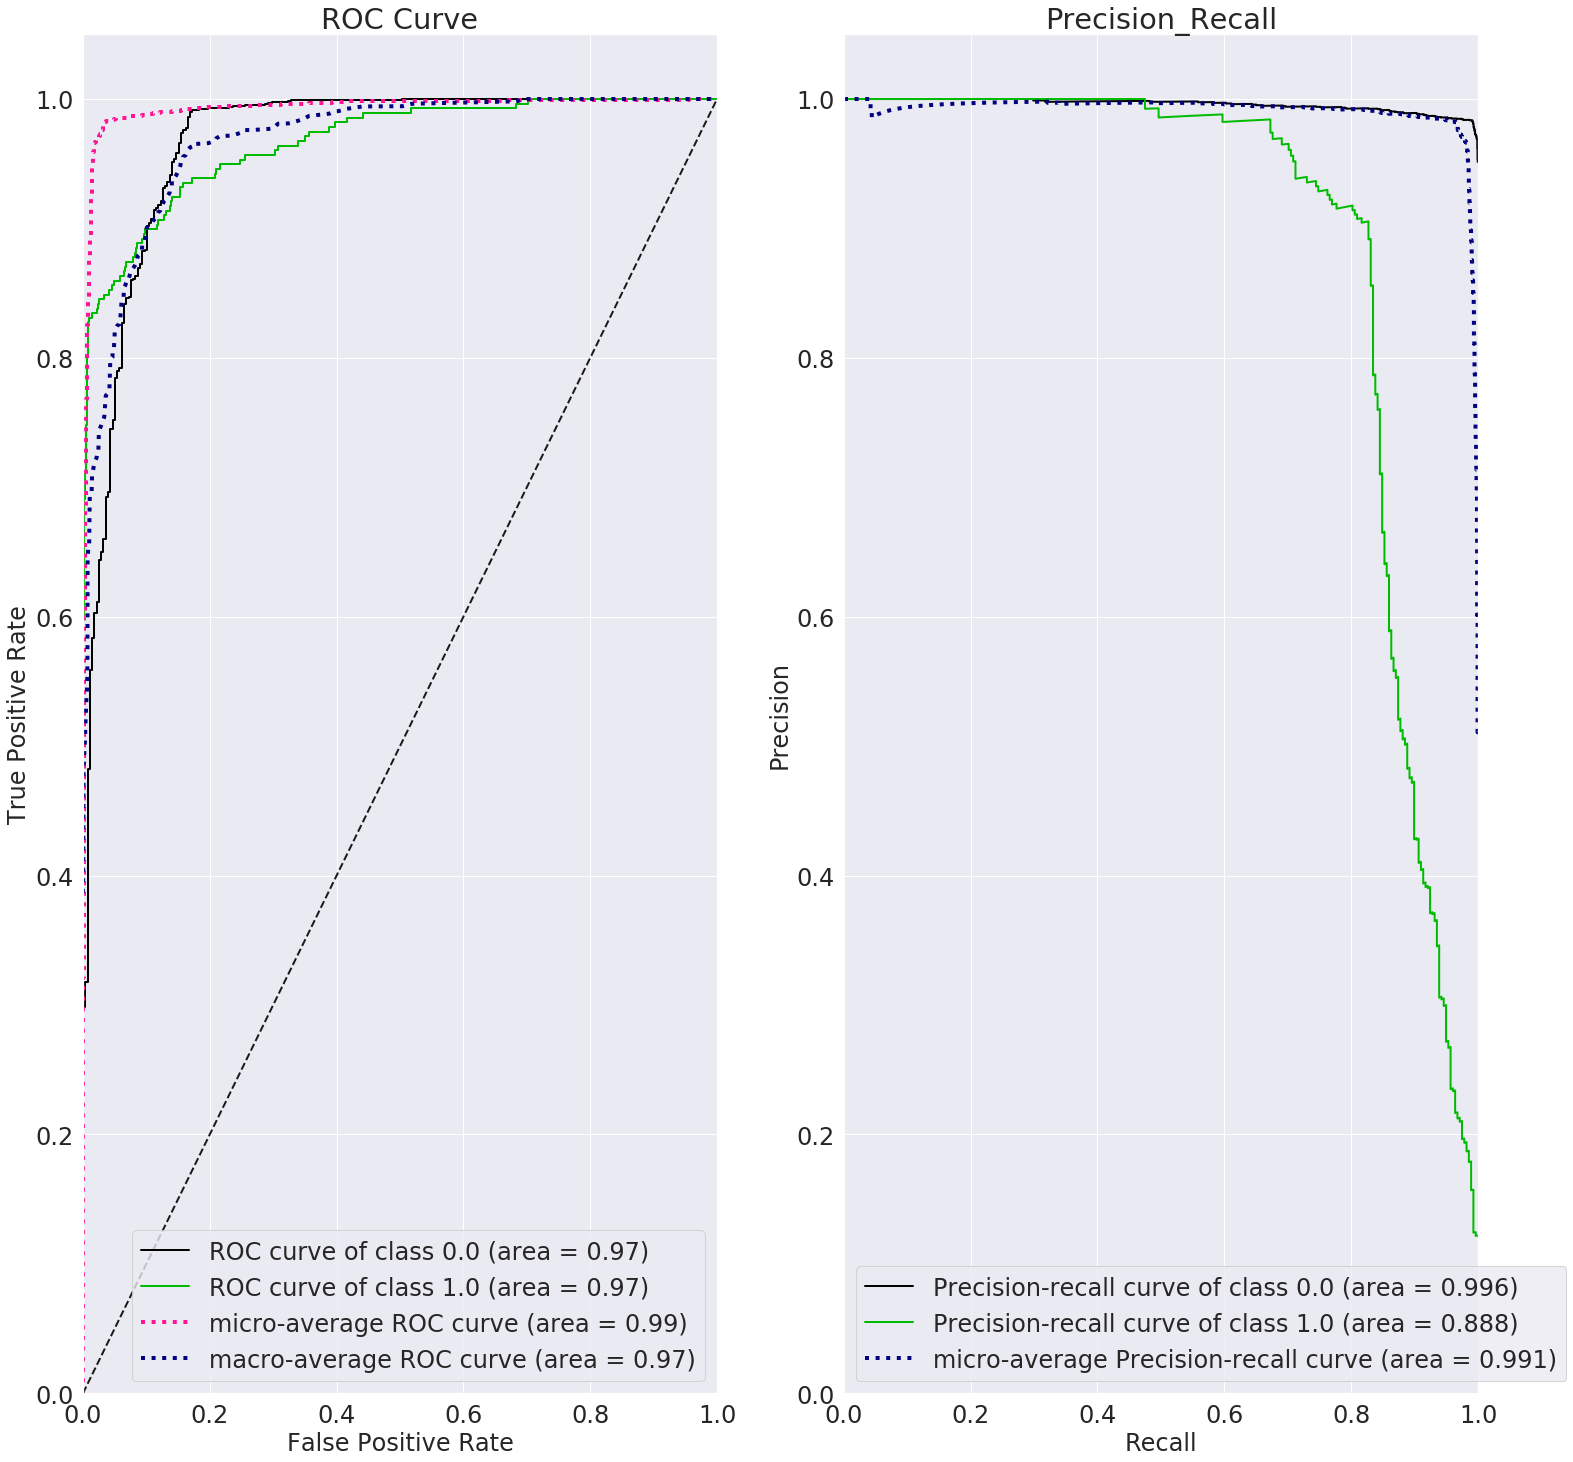

In [17]:
import scikitplot as skplt

logreg.fit(X_train, y_train)

plt.figure(figsize=(25,25))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

skplt.metrics.plot_roc(y_test, logreg.predict_proba(X_test), ax=ax1, title= 'ROC Curve')
skplt.metrics.plot_precision_recall(y_test, logreg.predict_proba(X_test), ax=ax2, title='Precision_Recall')

plt.show()

# Plotting the `Scatter-Plot` of Training and Test Set

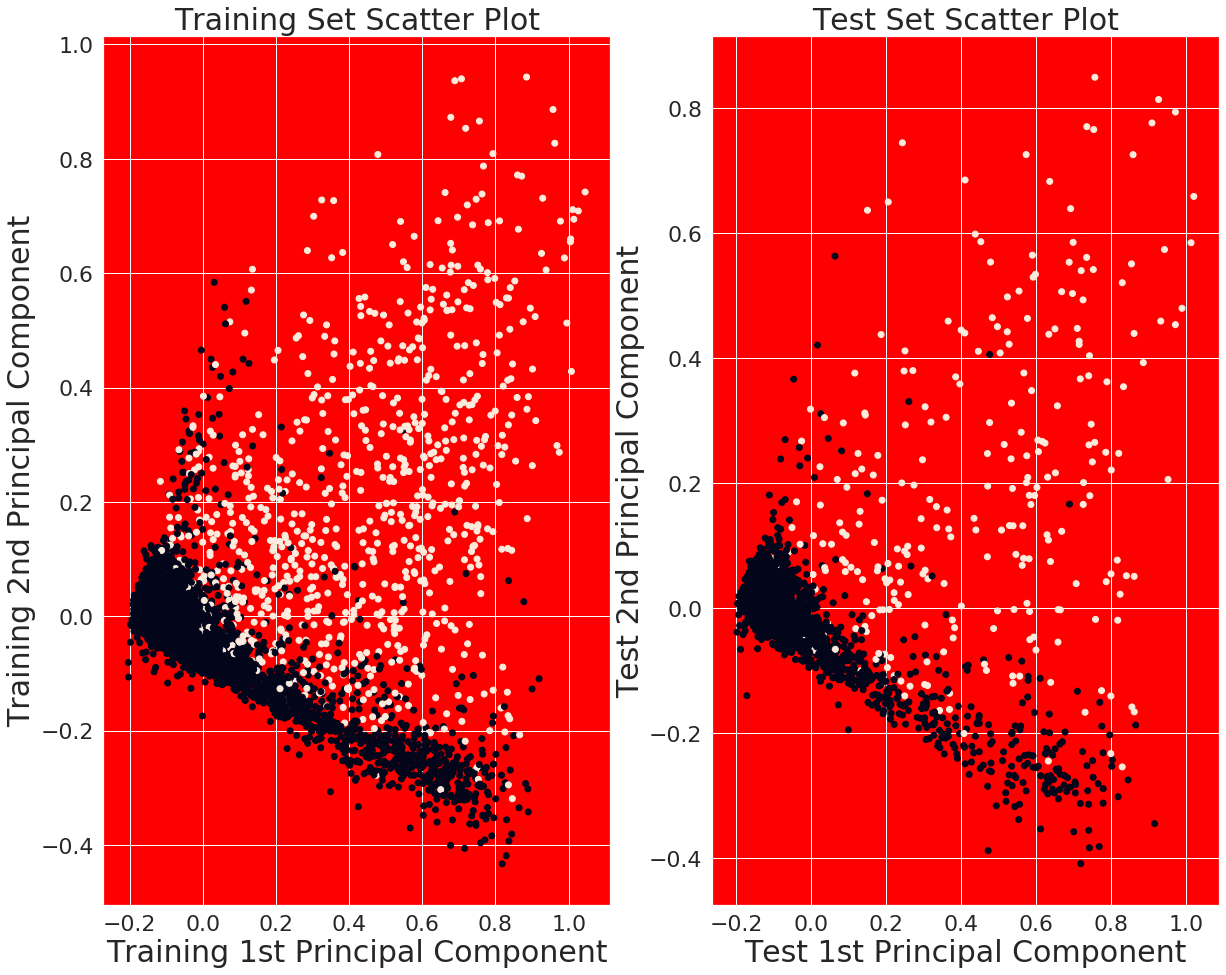

In [18]:
from sklearn.decomposition import IncrementalPCA
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 16))
plt.subplot(121, facecolor='red')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component', fontsize=30)
plt.ylabel('Training 2nd Principal Component', fontsize=30)
plt.title('Training Set Scatter Plot', fontsize=30)
plt.subplot(122, facecolor='red')
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component', fontsize=30)
plt.ylabel('Test 2nd Principal Component', fontsize=30)
plt.title('Test Set Scatter Plot', fontsize=30)
plt.show()

## **Training and Test Set Scatter Plots with labels indicated by colors i.e., (0) -> Violet and (1) -> White**

# SVC

## Grid-search with cross-validation

For SVM with an RBF (radial basis function) kernel, there are two important parameters: the kernel bandwidth gamma and the regularization parameter C. I want to try values 0.001, 0.01, 0.1, 1, 10 and 100 for the parameter C, and the same for gamma. Because I have six different settings for C and gamma that I want to try, I have 36 combinations of parameters in total.

In [19]:
from sklearn.svm import SVC
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm_scaled = SVC(**best_parameters)
svm_scaled.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model Accuracy

In [20]:
print('Accuracy of SVC on train set: {:.2f}' .format(svm_scaled.score(X_train_scaled, y_train)))
print('Accuracy of SVC on test set: {:.2f}' .format(svm_scaled.score(X_test_scaled, y_test)))

Accuracy of SVC on train set: 0.96
Accuracy of SVC on test set: 0.96


### I predicted the correct class on 96% of the samples in X_test. 

# DecisionTreeClassifier

### Using `X_train` and `y_train`, train a `DecisionTreeClassifier` with default parameters and random_state=0. 

In [21]:
DTClf = DecisionTreeClassifier(random_state = 0)  #DTClf = Decision Tree Classifier
DTClf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [22]:
Model_Prediction = DTClf.predict(X_test)

### In order to show easily the differences between model-based prediction and real values, I create a dataframe.

In [23]:
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction}
dfC = pd.DataFrame(data=d)
dfC.head(10)

,real or true values(y_test),Model_Prediction
11075,0.0,0.0
11742,0.0,0.0
1656,0.0,0.0
9108,0.0,0.0
10632,0.0,0.0
5452,0.0,0.0
6603,0.0,0.0
10859,0.0,0.0
9534,0.0,0.0
7284,0.0,0.0


### Model Accuracy

In [24]:
print('Accuracy of Decision Tree classifier on train set: {:.2f}' .format(DTClf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(DTClf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on train set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


### 97% of pulsar stars can be distinguished using this model.

# KNeighborsClassifier 

### Using `X_train` and `y_train`, train a `KNeighborsClassifier ` with default parameters and n_neighbors=7. 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNClf = KNeighborsClassifier(n_neighbors = 7)  # KNClf= KNeighborsClassifier
KNClf.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

### Model prediction

In [26]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
Model_Prediction_knn

array([0., 0., 0., ..., 0., 0., 0.])

### Model Accuracy

In [27]:
print('Accuracy of KNeighborsClassifier on train set: {:.2f}' .format(KNClf.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}' .format(KNClf.score(X_test, y_test)))

Accuracy of KNeighborsClassifier on train set: 0.97
Accuracy of KNeighborsClassifier on test set: 0.97


### The model can distinguish 97% of pulsar stars.

### Is `n_neighbors = 7 ` the best value? Yes, because:

In [28]:
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.96232439, 0.97190294, 0.97254151, 0.97254151, 0.97190294,
       0.97318008, 0.97381865, 0.97318008, 0.97381865, 0.97190294,
       0.97254151, 0.97094508, 0.97158365, 0.9706258 ])

### To better understand, I visualize previous cell to see better the relationship between `Accuracy ` and `Number of Neighbors(K)`.

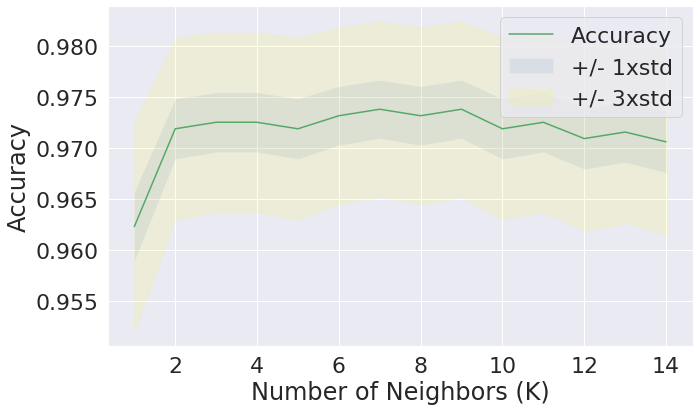

In [29]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='yellow')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
print("The best accuracy is {:.2f}" .format(mean_acc.max()), "with k =", mean_acc.argmax()+ 1)

The best accuracy is 0.97 with k = 7


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Model_Prediction_knn))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2854
         1.0       0.00      0.00      0.00       278

    accuracy                           0.91      3132
   macro avg       0.46      0.50      0.48      3132
weighted avg       0.83      0.91      0.87      3132



# Neural network

### Using `X_train_scaled` and `y_train_scaled`, train a `MLPClassifier ` . 

In [32]:
from sklearn.neural_network import MLPClassifier
nnclf = MLPClassifier(random_state=1, max_iter=300) #nnclf = neural network classifier
nnclf.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Model Accuracy

In [33]:
print('Accuracy of Neural network on train set: {:.2f}' .format(nnclf.score(X_train_scaled, y_train)))
print('Accuracy of Neural network on test set: {:.2f}' .format(nnclf.score(X_test_scaled, y_test)))

Accuracy of Neural network on train set: 0.98
Accuracy of Neural network on test set: 0.98


## Here I plot  `ROC Curves ` that reflect ROC scores in comparison charts. This provides us with a better understanding of which algorithm works best for our dataset.  

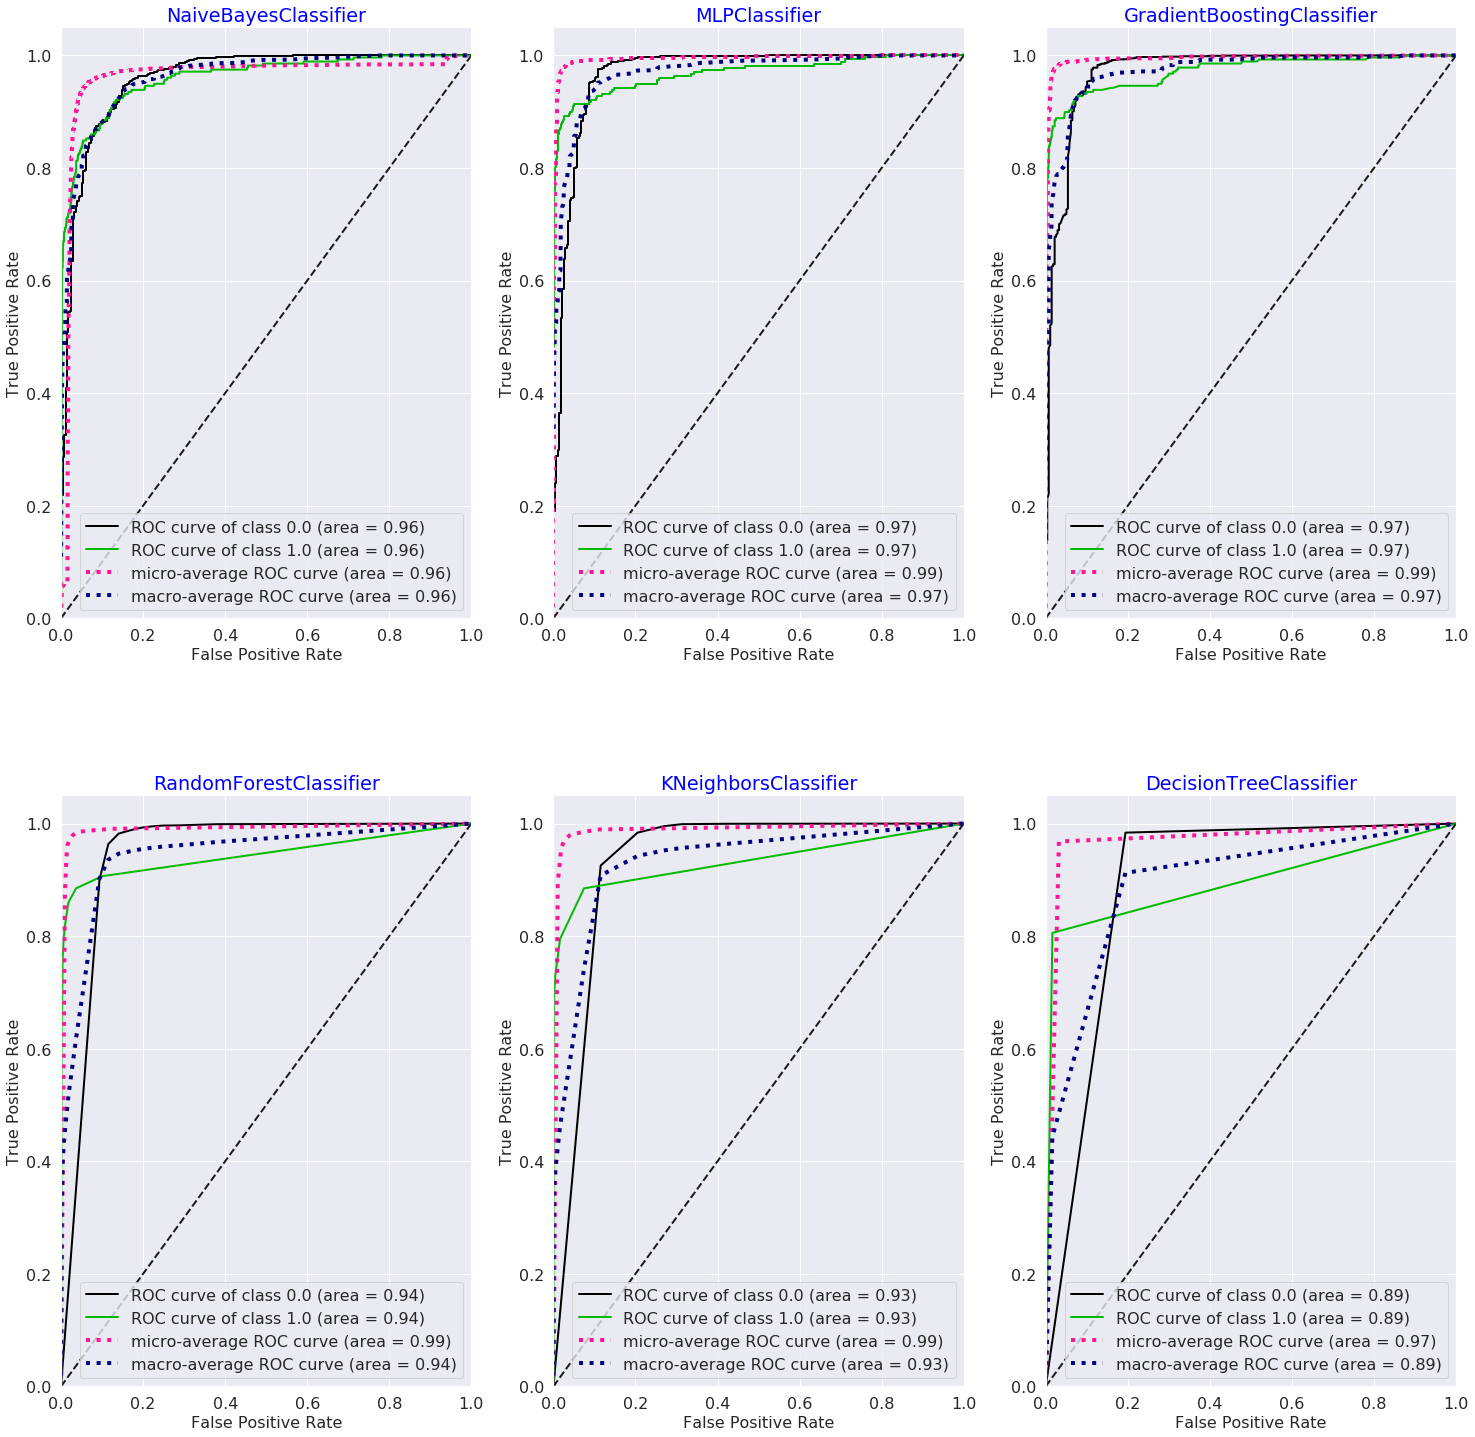

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

NBC = GaussianNB() 
NNC = MLPClassifier(random_state=1, max_iter=300)
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()

classifiers = [NBC, NNC, GBC, RFC, KNC, DTC]
title = ['NaiveBayesClassifier','MLPClassifier','GradientBoostingClassifier','RandomForestClassifier',
         'KNeighborsClassifier', 'DecisionTreeClassifier']

for cls in classifiers:
    cls.fit(X_train, y_train)

import scikitplot as skplt

plt.figure(figsize=(25,25))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.3)

for i in range(6):

    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, title=title[i])

plt.show()

## Based on graphs in terms of ROC Curves, the best algorithms for pulsar dataset are respectively:

### A. For Prediction of class 0 (or Not Pulsar satars), the best algorithms are respectively: 
#### 1. LogisticRegression & MLPClassifier & GradientBoostingClassifier
#### 2. NaiveBayesClassifier
#### 3. RandomForestClassifier
#### 4. KNeighborsClassifier
#### 5. DecisionTreeClassifier

### B. For Prediction of class 1 (or Pulsar satars), the best algorithms are respectively: 
#### 1. LogisticRegression & MLPClassifier & GradientBoostingClassifier
#### 2. NaiveBayesClassifier
#### 3. RandomForestClassifier
#### 4. KNeighborsClassifier
#### 5. DecisionTreeClassifier

## Additionally, I plot the  `Precision-Recall Curve ` and  `Confusion Matrix ` to determine which algorithms are best for this dataset in general.     

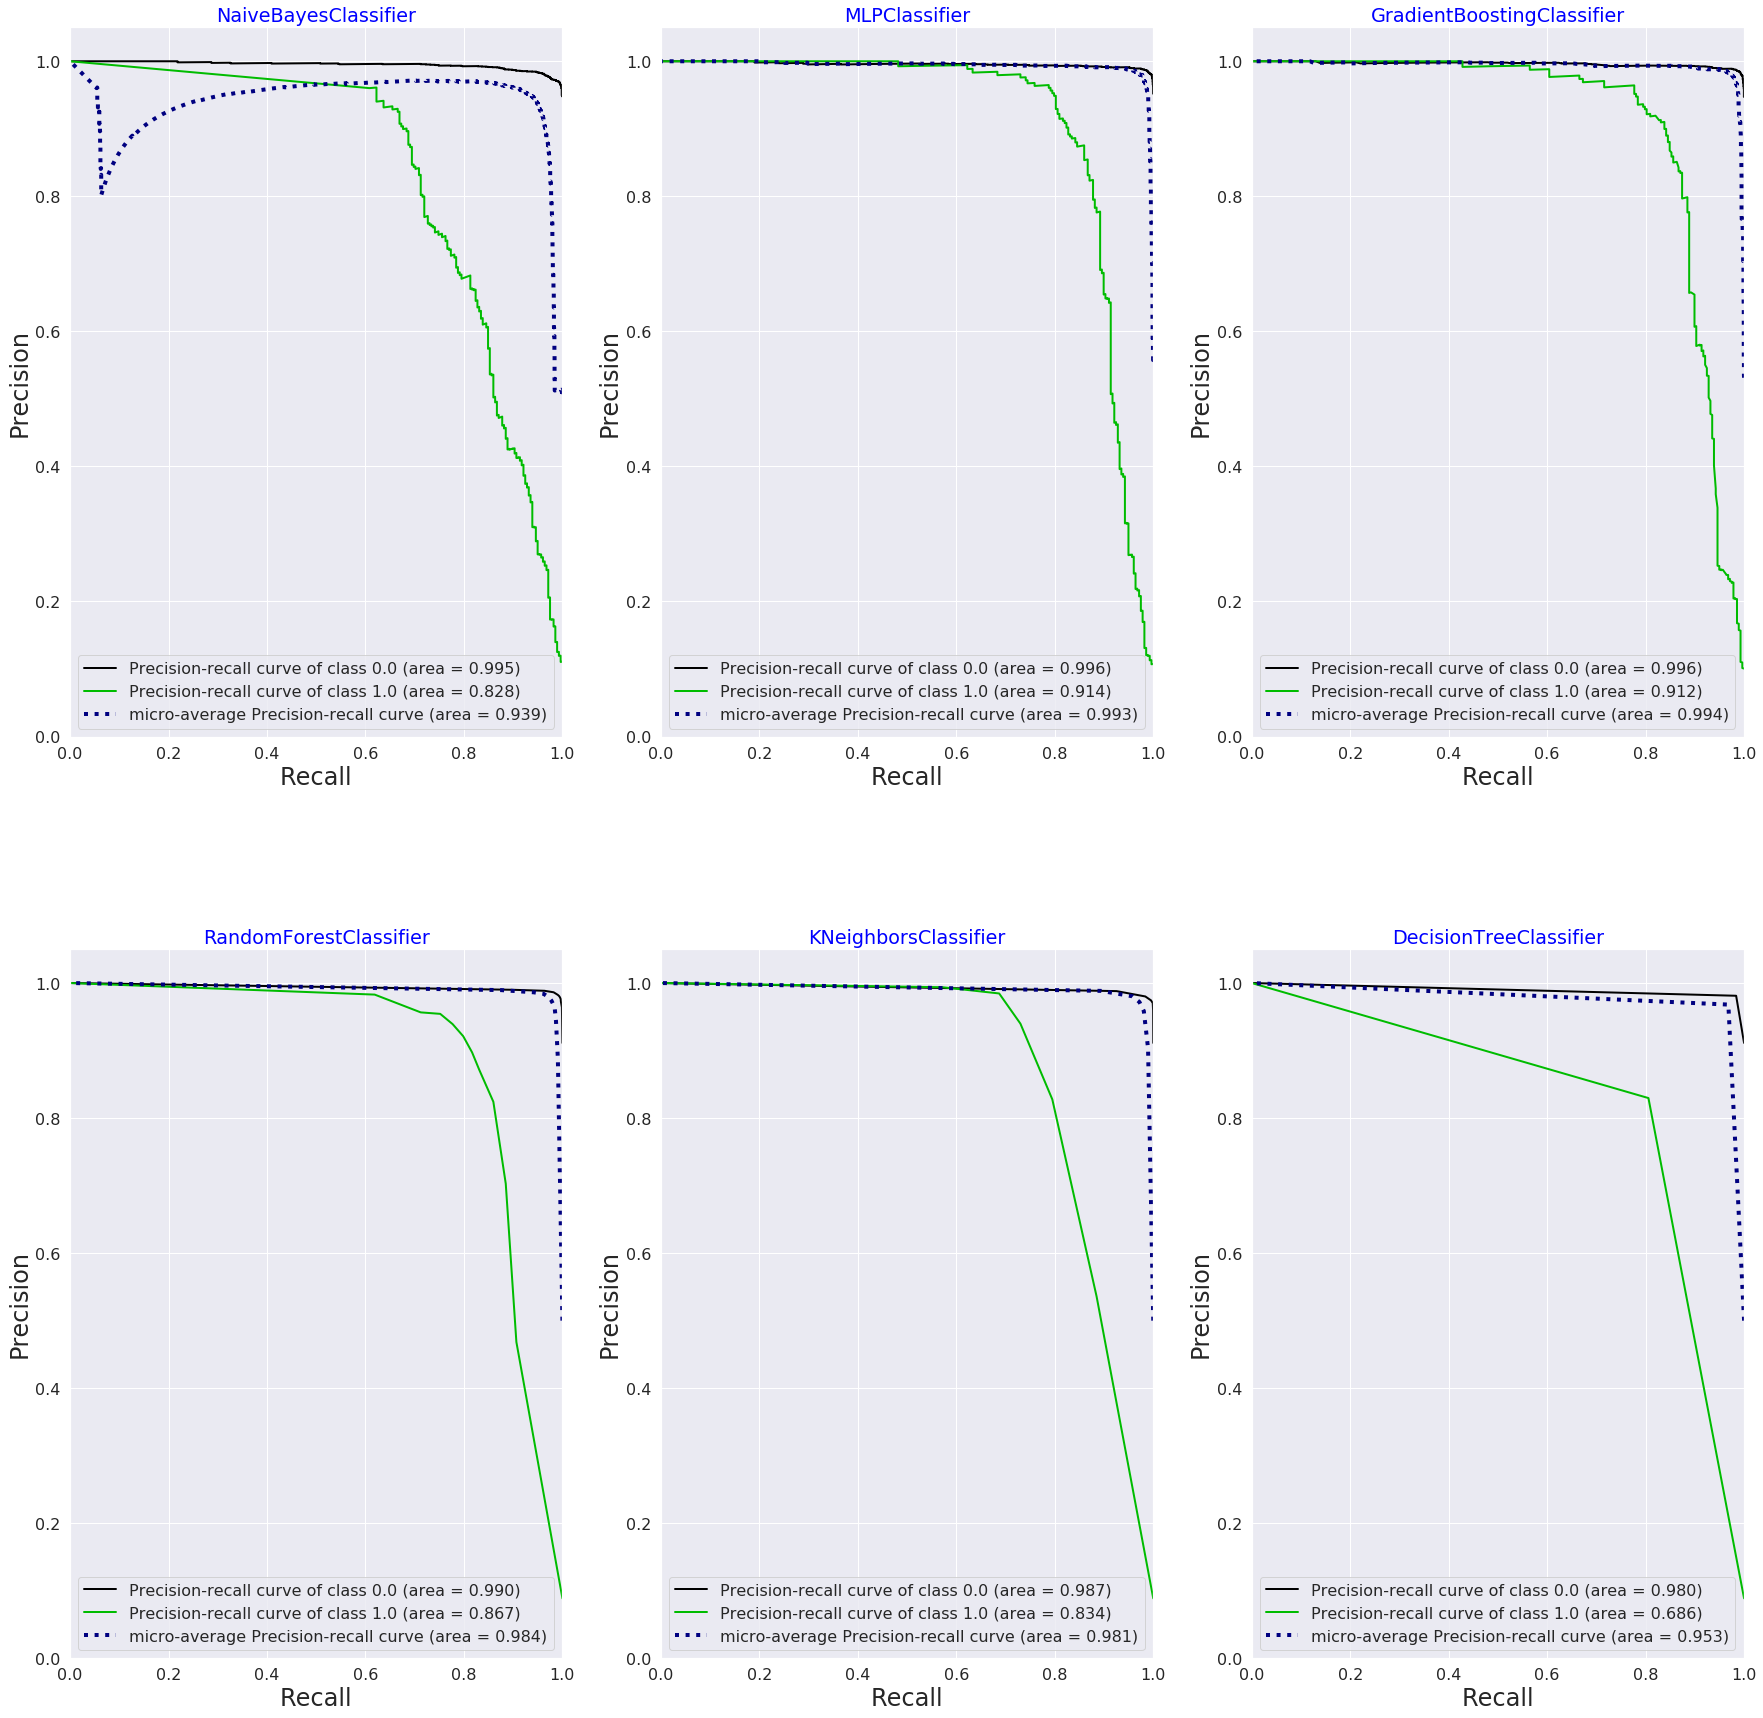

In [35]:
plt.figure(figsize=(30,30))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.3)

for i in range(6):

    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test), ax=ax, title=title[i])

plt.show()

## For Precision-Recall Curve:
### A. For Prediction of class 0 (or Not Pulsar satars), the best algorithms are respectively: 
#### 1. LogisticRegression & MLPClassifier & GradientBoostingClassifier
#### 2. NaiveBayesClassifier
#### 3. RandomForestClassifier
#### 4. KNeighborsClassifier
#### 5. DecisionTreeClassifier

### B. For Prediction of class 1 (or Pulsar satars), the best algorithms are respectively: 
#### 1. MLPClassifier
#### 2. GradientBoostingClassifier 
#### 3. LogisticRegression 
#### 4. RandomForestClassifier 
#### 5. KNeighborsClassifier 
#### 6. NaiveBayesClassifier 
#### 7. DecisionTreeClassifier

# Confusion Matrix

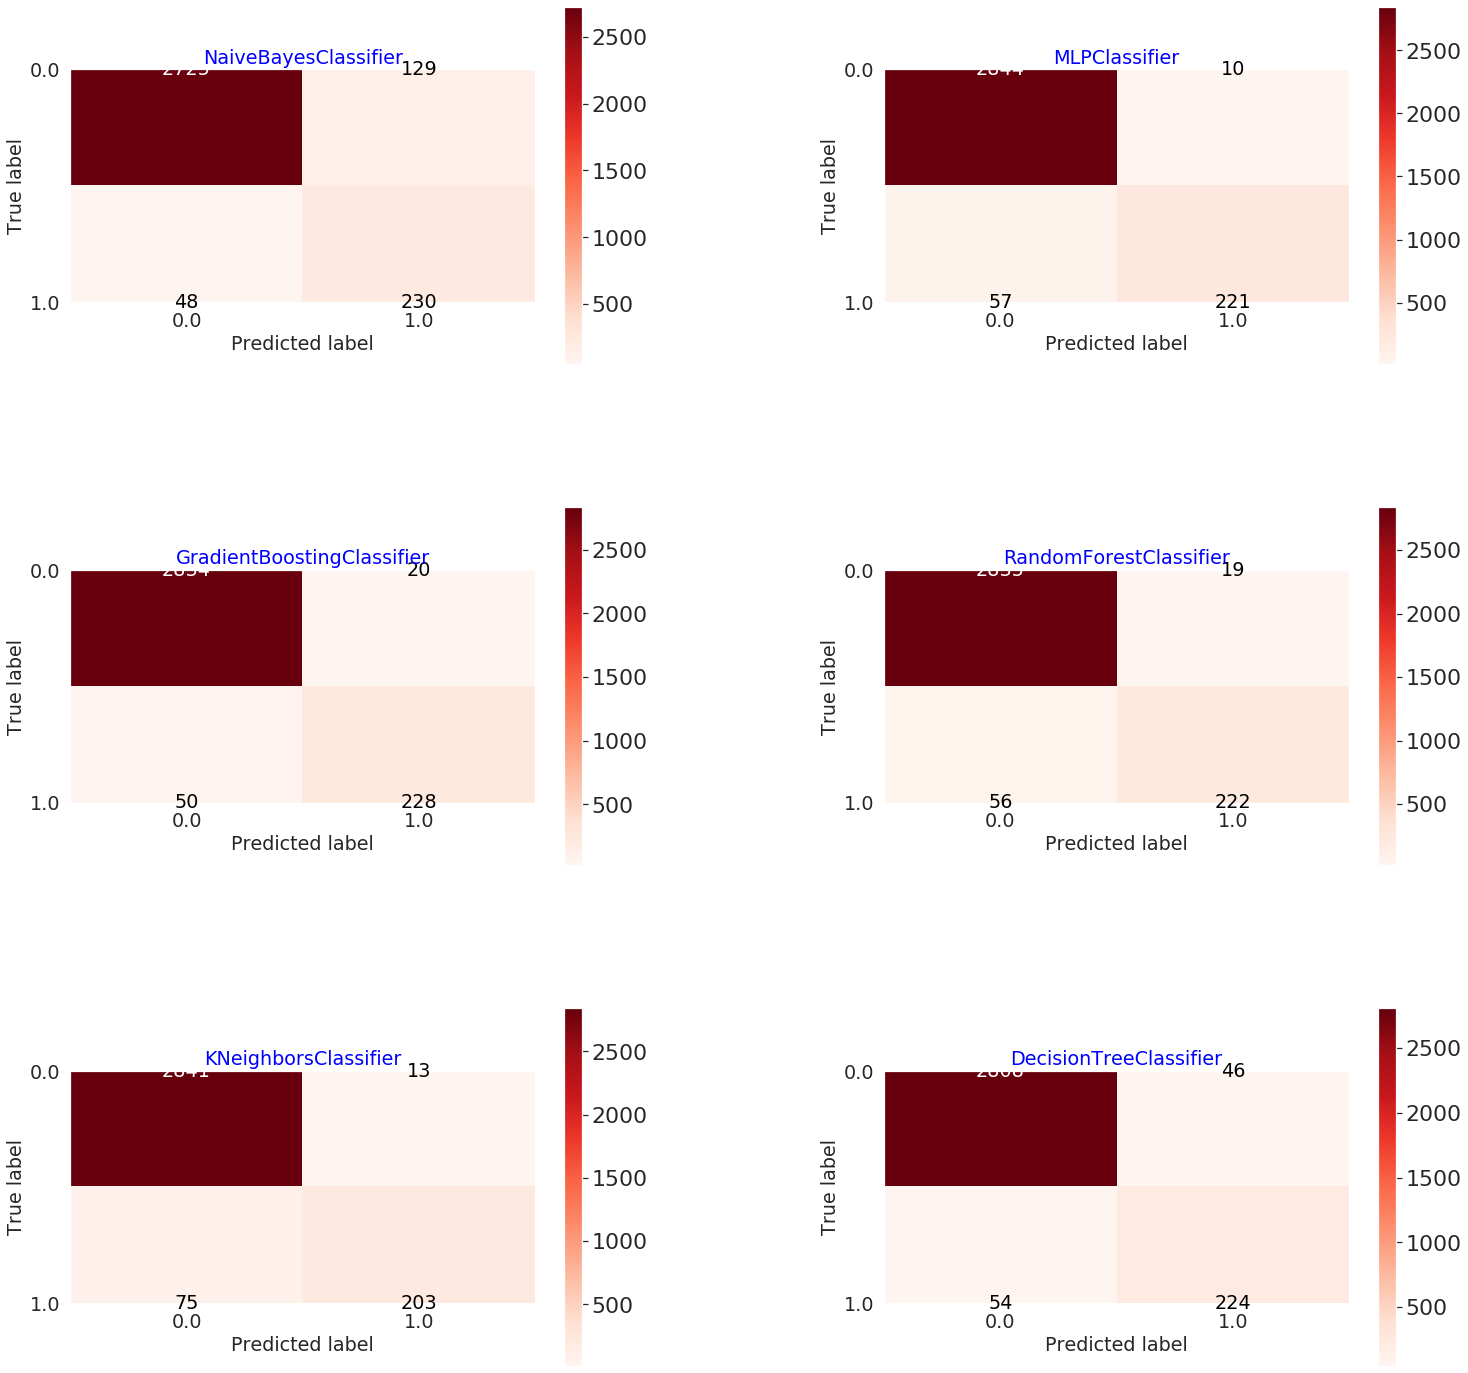

In [36]:
plt.figure(figsize=(25, 25))
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.4)


for i in range(6):

    col, row = i%2,i//2
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_confusion_matrix(y_test, model.predict(X_test), ax=ax, cmap='Reds', title=title[i], text_fontsize='large')

plt.show()

## Just MLPClassifier is interpreted, others are the same.

## The model predicts 221 records as Pulsar stars, and they really are Pulsar stars.
## 2844 records are predicted not to be Pulsar stars, and it is true they are not.
## In this case, the model incorrectly predicts 10 records as Pulsar stars.
## The model incorrectly predicts 57 records as not being Pulsar stars when in fact, they are Pulsar stars.